# Proyek Tugas Kecerdasan Komputasional : Klasifikasi Lokasi Penyakit Tuberculosis Menggunakan Metode Random Forest

Anggota Kelompok 8 :

*   Sabil Ahmad Hidayat (220411100058)
*   Vania Wrenda (220411100092)
*   Melly Chandra Wardani (220411100146)

Kelas : Kecerdasan Komputasional B

Link Projek : https://github.com/meinhere/ta-kk



# Data Preparation

## Import Library

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

# Visualisation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_df = pd.DataFrame(pd.read_excel("https://raw.githubusercontent.com/meinhere/ta-kk/master/dataset/tuberculosis.xlsx"))
data_df.head()

,UMUR,JENIS KELAMIN,KECAMATAN,FOTO TORAKS,STATUS HIV,RIWAYAT DIABETES,HASIL TCM,LOKASI ANATOMI (target/output)
0,17,P,AROSBAYA,Positif,Negatif,Tidak,Tidak dilakukan,Paru
1,19,P,KONANG,Positif,Negatif,Tidak,Tidak dilakukan,Paru
2,37,P,MODUNG,Positif,Negatif,Tidak,Tidak dilakukan,Paru
3,62,P,KAMAL,Positif,Negatif,Tidak,Tidak dilakukan,Paru
4,25,P,MODUNG,Tidak dilakukan,Negatif,Tidak,Tidak dilakukan,Ekstra paru


### Acessing Data


#### Metadata

Di dalam dataset yang ada, terdapat 985 data dan 8 atribut/feature.

In [3]:
kelas = "LOKASI ANATOMI (target/output)"

print(f"Jumlah Atribut/Feature : {len(data_df.axes[1])}")
print(f"Jumlah Data : {len(data_df.axes[0])}")
print(f"Jumlah Label : 1 [{kelas}]")
print(f"Jumlah Kelas : {len(data_df[kelas].unique())} {data_df[kelas].unique()}")

Jumlah Atribut/Feature : 8
Jumlah Data : 985
Jumlah Label : 1 [LOKASI ANATOMI (target/output)]
Jumlah Kelas : 2 ['Paru' 'Ekstra paru']


## Exploratory Data Analysis (EDA)

### Mengecek tipe data yang dipakai dalam dataset

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   UMUR                            985 non-null    int64 
 1   JENIS KELAMIN                   985 non-null    object
 2   KECAMATAN                       985 non-null    object
 3   FOTO TORAKS                     985 non-null    object
 4   STATUS HIV                      985 non-null    object
 5   RIWAYAT DIABETES                985 non-null    object
 6   HASIL TCM                       985 non-null    object
 7   LOKASI ANATOMI (target/output)  985 non-null    object
dtypes: int64(1), object(7)
memory usage: 61.7+ KB


Dari hasil informasi diatas, tipe data yang ada dalam dataset sudah sesuai dengan yang dibutuhkan (tidak ada yang salah).

###Mengecek apakah ada missing value dalam dataset

In [5]:
tcm = len(data_df[data_df['HASIL TCM'] == 'Tidak dilakukan'])
toraks = len(data_df[data_df['FOTO TORAKS'] == 'Tidak dilakukan'])
hiv = len(data_df[data_df['STATUS HIV'] == 'Tidak diketahui'])
diabet = len(data_df[data_df['RIWAYAT DIABETES'] == 'Tidak diketahui'])

print(f"Jumlah 'HASIL TCM' dengan nilai 'Tidak dilakukan': {tcm}")
print(f"Jumlah 'FOTO TORAKS' dengan nilai 'Tidak dilakukan': {toraks}")
print(f"Jumlah 'STATUS HIV' dengan nilai 'Tidak diketahui': {hiv}")
print(f"Jumlah 'RIWAYAT DIABETES' dengan nilai 'Tidak diketahui': {diabet}")

Jumlah 'HASIL TCM' dengan nilai 'Tidak dilakukan': 439
Jumlah 'FOTO TORAKS' dengan nilai 'Tidak dilakukan': 28
Jumlah 'STATUS HIV' dengan nilai 'Tidak diketahui': 261
Jumlah 'RIWAYAT DIABETES' dengan nilai 'Tidak diketahui': 7


###Mengecek apakah ada data yang duplicated pada dataset

In [6]:
data_df.duplicated().sum()

42

## Preprocessing Data

### Cleaning Data

In [7]:
data_df = data_df.drop_duplicates()
data_df.duplicated().sum()

0

In [8]:
data_df['HASIL TCM'] = data_df['HASIL TCM'].replace('Tidak dilakukan', 'Rif Sensitif')
data_df['FOTO TORAKS'] = data_df['FOTO TORAKS'].replace('Tidak dilakukan', 'Positif')
data_df['STATUS HIV'] = data_df['STATUS HIV'].replace('Tidak diketahui', 'Negatif')
data_df['RIWAYAT DIABETES'] = data_df['RIWAYAT DIABETES'].replace('Tidak diketahui', 'Tidak')

tcm = len(data_df[data_df['HASIL TCM'] == 'Tidak dilakukan'])
toraks = len(data_df[data_df['FOTO TORAKS'] == 'Tidak dilakukan'])
hiv = len(data_df[data_df['STATUS HIV'] == 'Tidak diketahui'])
diabet = len(data_df[data_df['RIWAYAT DIABETES'] == 'Tidak diketahui'])

print(f"Jumlah 'HASIL TCM' dengan nilai 'Tidak dilakukan': {tcm}")
print(f"Jumlah 'FOTO TORAKS' dengan nilai 'Tidak dilakukan': {toraks}")
print(f"Jumlah 'STATUS HIV' dengan nilai 'Tidak diketahui': {hiv}")
print(f"Jumlah 'RIWAYAT DIABETES' dengan nilai 'Tidak diketahui': {diabet}")

Jumlah 'HASIL TCM' dengan nilai 'Tidak dilakukan': 0
Jumlah 'FOTO TORAKS' dengan nilai 'Tidak dilakukan': 0
Jumlah 'STATUS HIV' dengan nilai 'Tidak diketahui': 0
Jumlah 'RIWAYAT DIABETES' dengan nilai 'Tidak diketahui': 0


###Encoding Data

In [9]:
# label encoder
le = LabelEncoder()
le_copy = data_df.apply(lambda x: x.unique())
le_copy_encode = le_copy.apply(lambda x: le.fit_transform(x))

print(f"Atribut Lokasi Anatomi \n{le_copy}\n")
print(f"Atribut Lokasi Anatomi Encode \n{le_copy_encode}\n")

Atribut Lokasi Anatomi 
UMUR                              [17, 19, 37, 62, 25, 56, 31, 26, 50, 47, 57, 3...
JENIS KELAMIN                                                                [P, L]
KECAMATAN                         [AROSBAYA, KONANG, MODUNG, KAMAL, BANGKALAN, K...
FOTO TORAKS                                                      [Positif, Negatif]
STATUS HIV                                                       [Negatif, Positif]
RIWAYAT DIABETES                                                        [Tidak, Ya]
HASIL TCM                                     [Rif Sensitif, Negatif, Rif resisten]
LOKASI ANATOMI (target/output)                                  [Paru, Ekstra paru]
dtype: object

Atribut Lokasi Anatomi Encode 
UMUR                              [15, 17, 35, 60, 23, 54, 29, 24, 48, 45, 55, 3...
JENIS KELAMIN                                                                [1, 0]
KECAMATAN                         [2, 28, 34, 21, 4, 24, 15, 55, 9, 61, 7, 31, 6...
FOTO T

In [10]:
data_df = data_df.apply(lambda x: le.fit_transform(x))
data_df

,UMUR,JENIS KELAMIN,KECAMATAN,FOTO TORAKS,STATUS HIV,RIWAYAT DIABETES,HASIL TCM,LOKASI ANATOMI (target/output)
0,15,1,2,1,0,0,1,1
1,17,1,28,1,0,0,1,1
2,35,1,34,1,0,0,1,1
3,60,1,21,1,0,0,1,1
4,23,1,34,1,0,0,1,0
...,...,...,...,...,...,...,...,...
979,14,1,4,0,0,0,1,0
980,51,0,64,0,0,0,1,0
981,15,1,65,0,0,0,1,0
982,14,0,55,0,0,0,1,0


### Korelasi antar Fitur

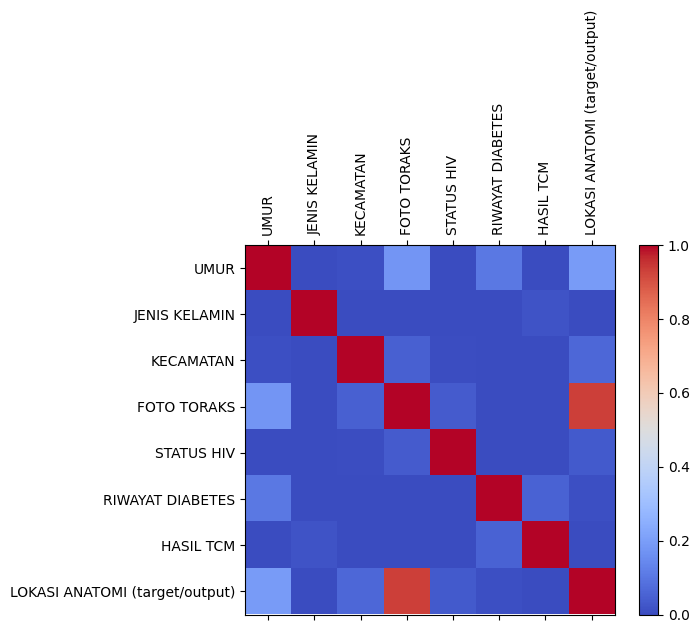

In [11]:
corr_data_df = data_df.copy()

corr = corr_data_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr_data_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_data_df.columns)
ax.set_yticklabels(corr_data_df.columns)
plt.show()

### Seleksi Fitur

In [12]:
main_df = pd.concat([data_df[data_df.columns[1]], data_df[data_df.columns[3:]]], axis=1)
features_df = main_df[main_df.columns[0:-1]]
labels_df = data_df["LOKASI ANATOMI (target/output)"]

# Modeling

## Random Forest Model

In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(features_df, labels_df, test_size = 0.25)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (707, 5)
Training Labels Shape: (707,)
Testing Features Shape: (236, 5)
Testing Labels Shape: (236,)


In [14]:
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(train_features, train_labels);

In [15]:
# Create predict for model
predictions = rf.predict(test_features)

# Calculate performance metrics for regression
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(test_labels, predictions)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.0211864406779661
Root Mean Squared Error: 0.1455556274348955
R-squared: 0.8938371569950517


In [16]:
# Calculate accuracy precision and recall
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9788135593220338
Precision: 0.9715909090909091
Recall: 1.0


## Evaluation Model

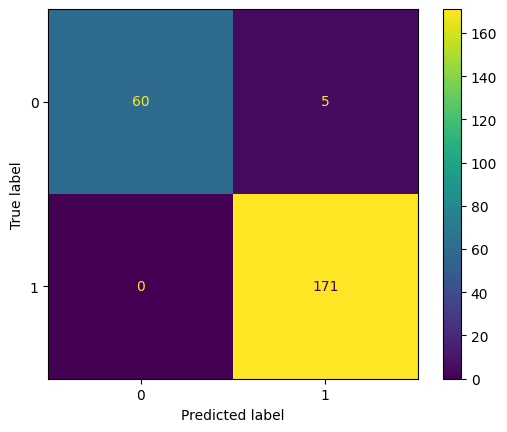

In [17]:
# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Visualization Tree

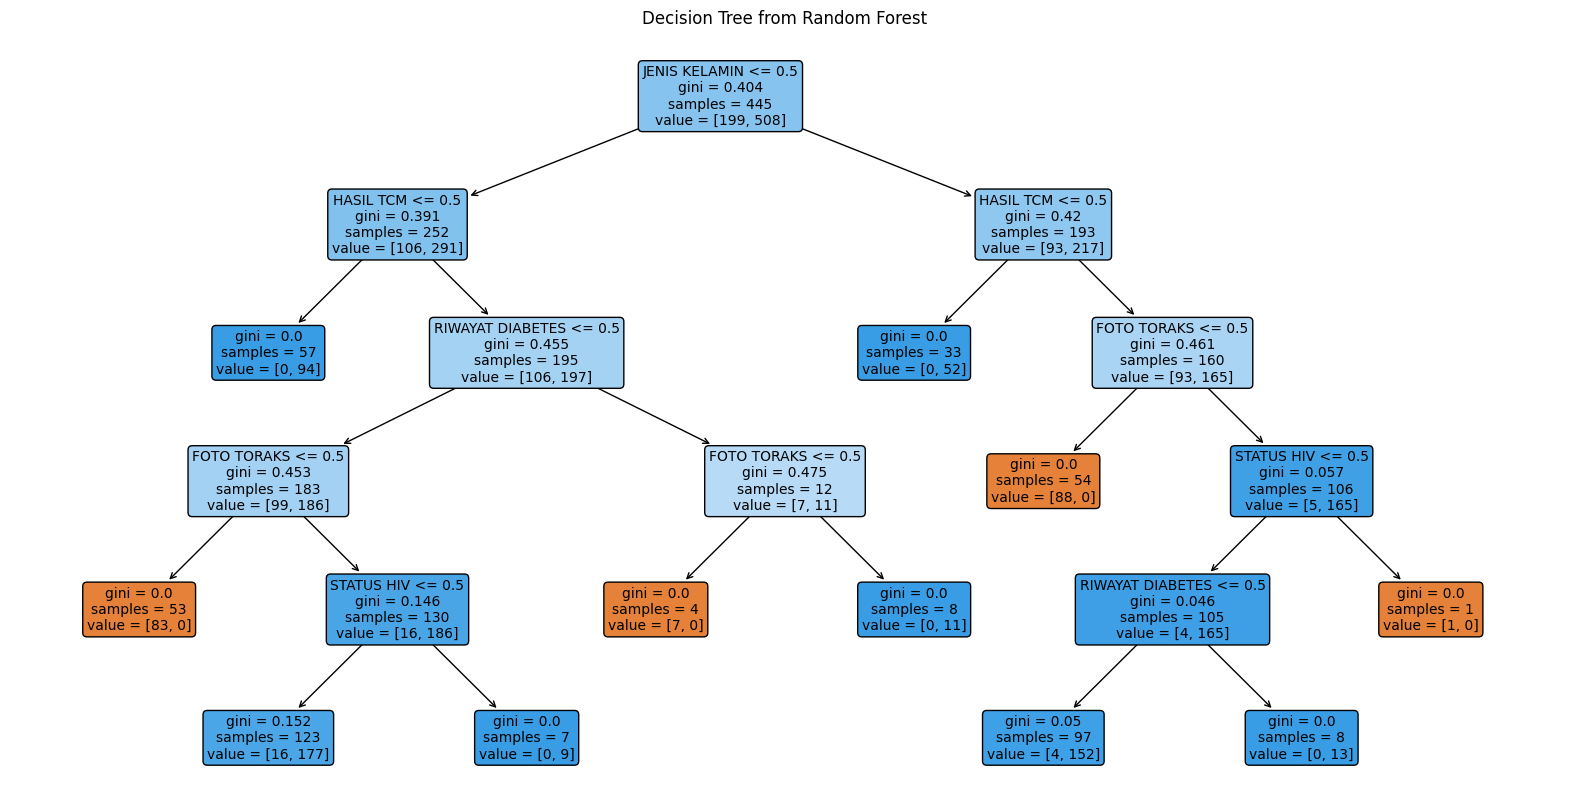

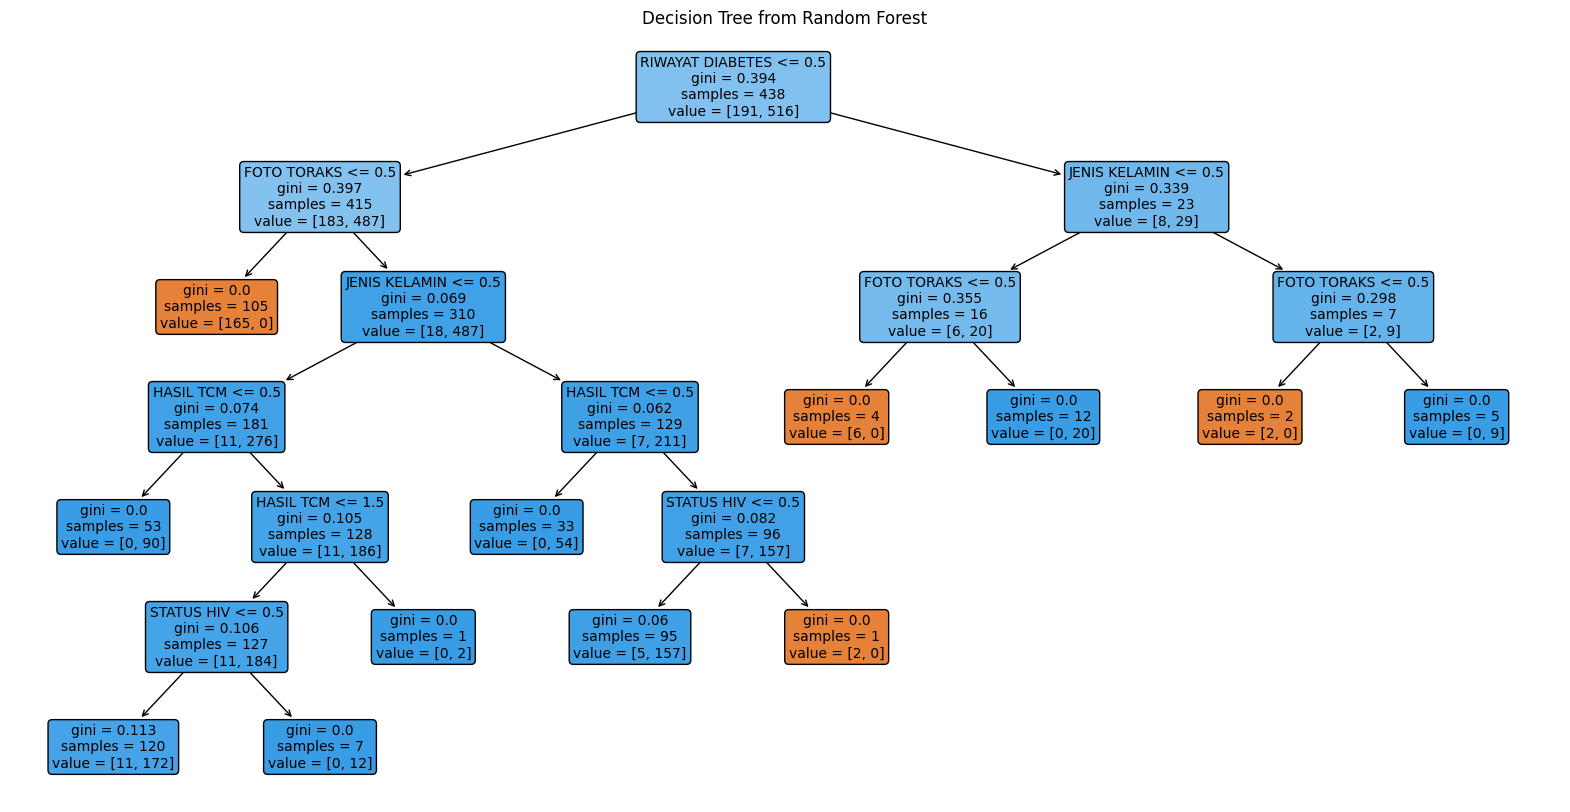

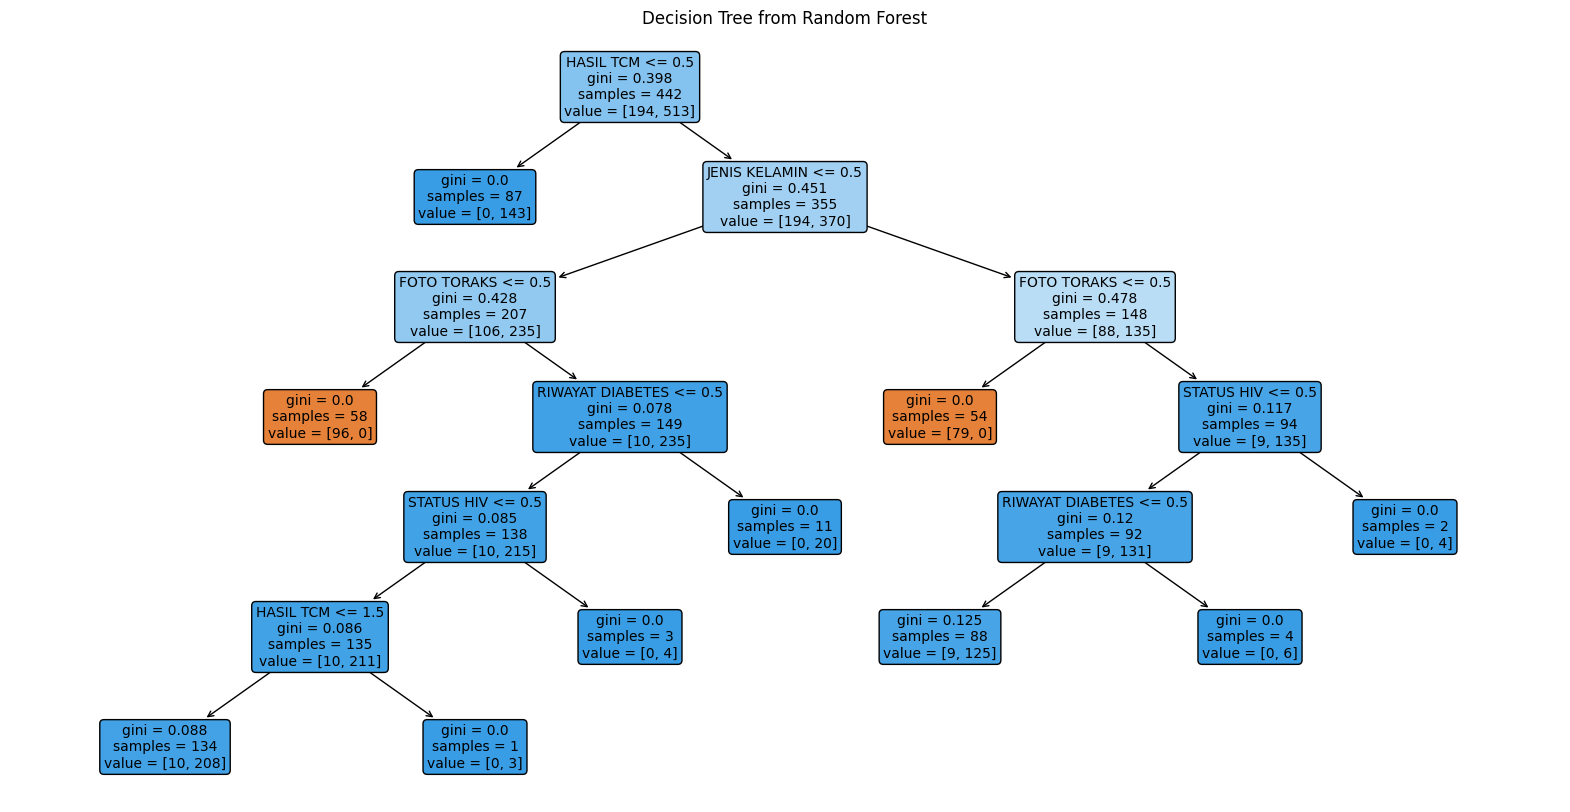

In [18]:
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)  # Fit the model

for i in range(3):
  # Pick one tree from the forest, e.g., the first tree (index 0)
  tree_to_plot = rf.estimators_[i]

  # Plot the decision tree
  plt.figure(figsize=(20, 10))
  plot_tree(tree_to_plot, feature_names=train_features.columns.tolist(), filled=True, rounded=True, fontsize=10)
  plt.title("Decision Tree from Random Forest")
  plt.show()

## Random Forest Model with Best Estimator

In [19]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(train_features, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bfb692a5390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bfb66ffda20>})

In [20]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 148}


In [21]:
predictions = best_rf.predict(test_features)

# Calculate performance metrics for regression
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(test_labels, predictions)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.0211864406779661
Root Mean Squared Error: 0.1455556274348955
R-squared: 0.8938371569950517


In [22]:
# Calculate accuracy precision and recall
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9788135593220338
Precision: 0.9715909090909091
Recall: 1.0


## Visualization Tree with Best Estimator

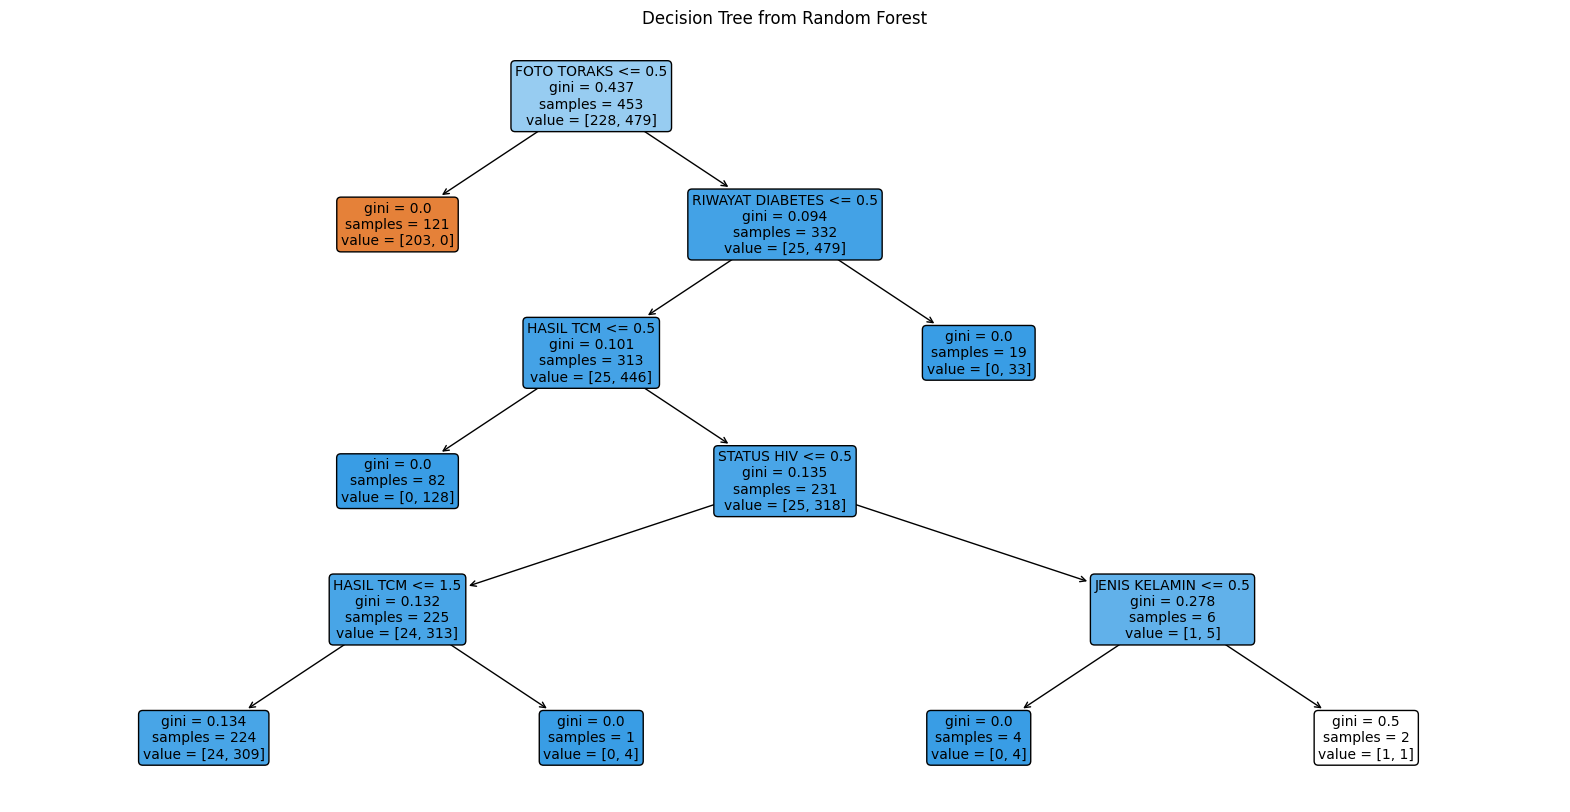

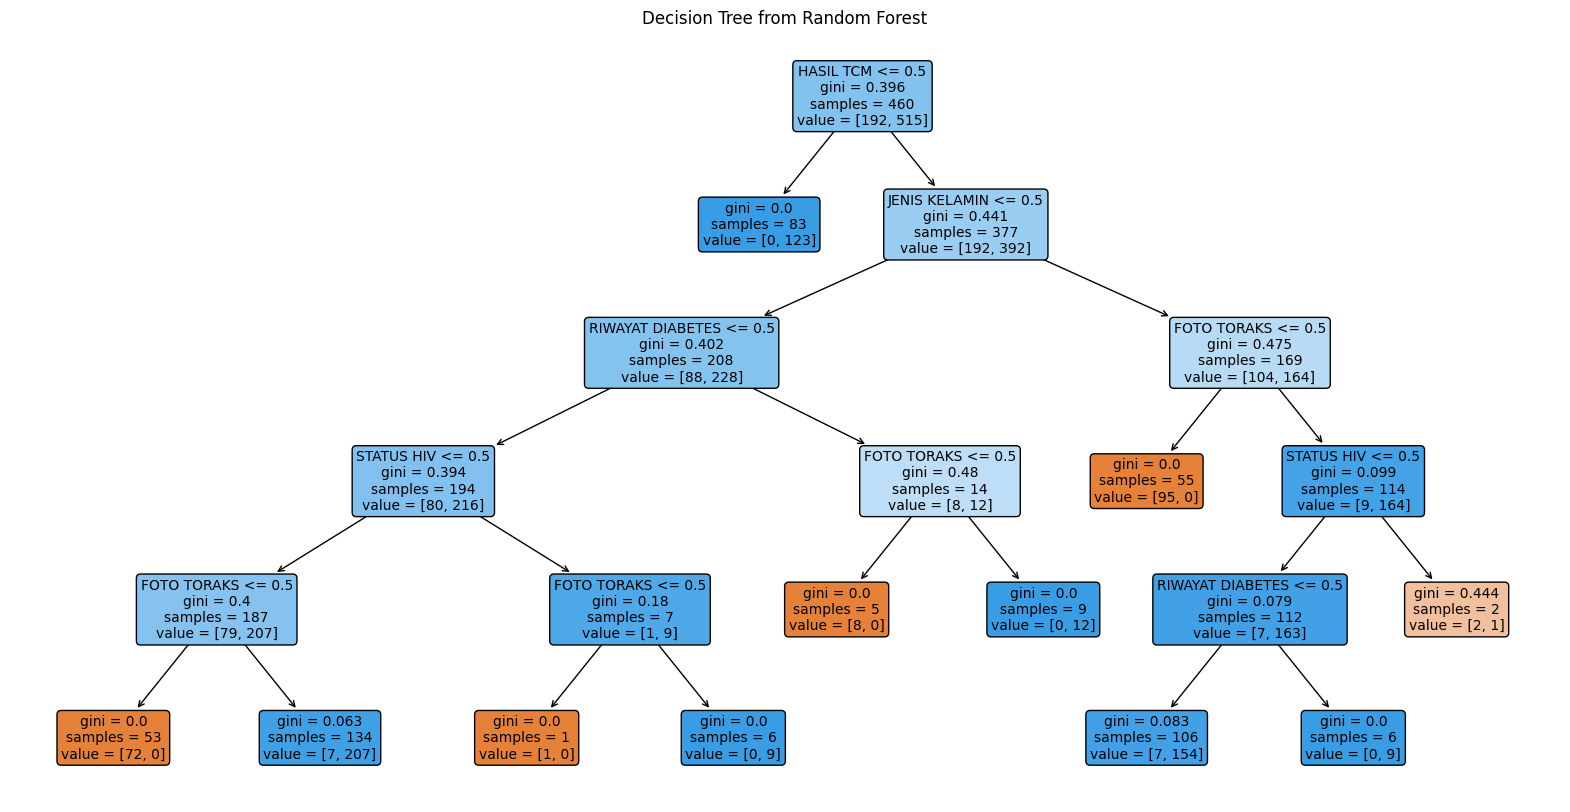

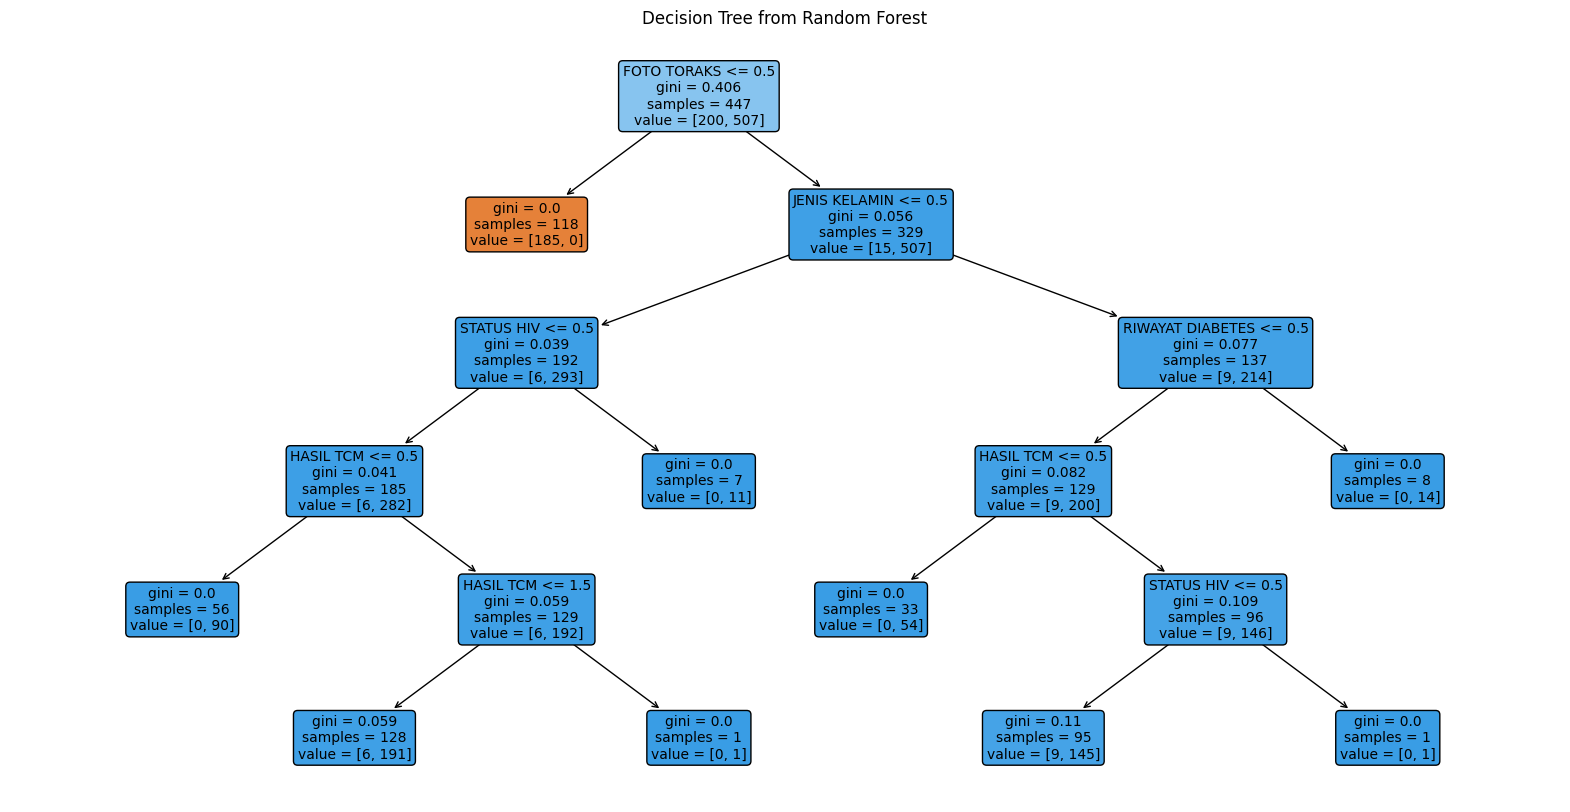

In [23]:
for i in range(3):
  # Pick one tree from the forest, e.g., the first tree (index 0)
  tree_to_plot = best_rf.estimators_[i]

  # Plot the decision tree
  plt.figure(figsize=(20, 10))
  plot_tree(tree_to_plot, feature_names=train_features.columns.tolist(), filled=True, rounded=True, fontsize=10)
  plt.title("Decision Tree from Random Forest")
  plt.show()

## Evaluation Model with Best Estimator

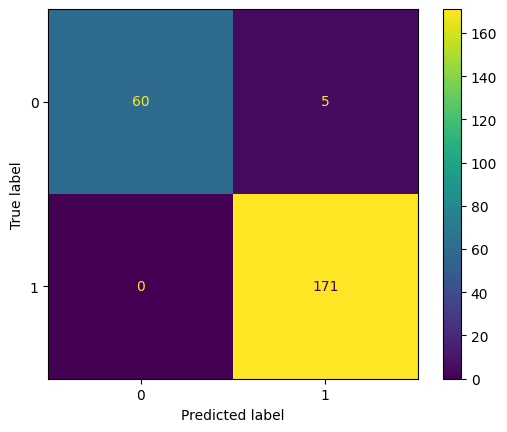

In [24]:
# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Saving Model

In [25]:
import pickle
# create an iterator object with write permission - model.pkl
with open('rf_pkl', 'wb') as files:
    pickle.dump(rf, files)

with open('best_rf_pkl', 'wb') as files:
    pickle.dump(best_rf, files)